#  Task: Exploratory data analysis on the proportion of women to men represention in San Francisco 

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('WomenRepresentaionInCityProperty-SanFrancisco.csv')
df.head()

,Department/Source,Name,Person,Gender,Reference,Comments,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
0,Administrator,MOSCONE CENTER (South),George R. Moscone,M,City Administrator,NaN,4,10,36,21,21
1,Administrator,Maxine Hall Health Center,NaN,F,Public Health,NaN,4,10,36,21,21
2,REC AND PARKS,Moscone Recreation Center,George R. Moscone,M,NaN,park,4,10,36,21,21
3,REC AND PARKS,"Helen Crocker Russell Library of Horticulture,...",Helen Crocker,F,NaN,facilities and other amenities,4,10,36,21,21
4,REC AND PARKS,"Sharon Building, Golden Gate Park",Sharon Building,M,NaN,facilities and other amenities,4,10,36,21,21


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Department/Source             82 non-null     object
 1   Name                          82 non-null     object
 2   Person                        81 non-null     object
 3   Gender                        82 non-null     object
 4   Reference                     54 non-null     object
 5   Comments                      32 non-null     object
 6   Current Police Districts      82 non-null     int64 
 7   Current Supervisor Districts  82 non-null     int64 
 8   Analysis Neighborhoods        82 non-null     int64 
 9   Neighborhoods                 82 non-null     int64 
 10  SF Find Neighborhoods         82 non-null     int64 
dtypes: int64(5), object(6)
memory usage: 7.2+ KB


In [4]:
df.describe(include='all')

,Department/Source,Name,Person,Gender,Reference,Comments,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
count,82,82,81,82,54,32,82.0,82.0,82.0,82.0,82.0
unique,8,82,69,5,21,13,NaN,NaN,NaN,NaN,NaN
top,Administrator,Flynn Tire Shop,George R. Moscone,M,Municipal Transportation Agency,facilities and other amenities,NaN,NaN,NaN,NaN,NaN
freq,46,1,6,53,9,11,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,4.0,10.0,36.0,21.0,21.0
std,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0
min,NaN,NaN,NaN,NaN,NaN,NaN,4.0,10.0,36.0,21.0,21.0
25%,NaN,NaN,NaN,NaN,NaN,NaN,4.0,10.0,36.0,21.0,21.0
50%,NaN,NaN,NaN,NaN,NaN,NaN,4.0,10.0,36.0,21.0,21.0
75%,NaN,NaN,NaN,NaN,NaN,NaN,4.0,10.0,36.0,21.0,21.0


In [5]:
#Check for null values
df.isnull().sum()

Department/Source                0
Name                             0
Person                           1
Gender                           0
Reference                       28
Comments                        50
Current Police Districts         0
Current Supervisor Districts     0
Analysis Neighborhoods           0
Neighborhoods                    0
SF Find Neighborhoods            0
dtype: int64

In [6]:
#Drop the Reference and Comments columns because it contain a lot of missing values
df1 = df.drop(['Reference','Comments'], axis=1, inplace=True)

In [7]:
df.head()

,Department/Source,Name,Person,Gender,Current Police Districts,Current Supervisor Districts,Analysis Neighborhoods,Neighborhoods,SF Find Neighborhoods
0,Administrator,MOSCONE CENTER (South),George R. Moscone,M,4,10,36,21,21
1,Administrator,Maxine Hall Health Center,NaN,F,4,10,36,21,21
2,REC AND PARKS,Moscone Recreation Center,George R. Moscone,M,4,10,36,21,21
3,REC AND PARKS,"Helen Crocker Russell Library of Horticulture,...",Helen Crocker,F,4,10,36,21,21
4,REC AND PARKS,"Sharon Building, Golden Gate Park",Sharon Building,M,4,10,36,21,21


In [8]:
#Fill null values
df.fillna('Unknown', axis=1, inplace=True)

In [9]:
data=df[['Department/Source','Name', 'Person', 'Gender']]

In [10]:
data.head()

,Department/Source,Name,Person,Gender
0,Administrator,MOSCONE CENTER (South),George R. Moscone,M
1,Administrator,Maxine Hall Health Center,Unknown,F
2,REC AND PARKS,Moscone Recreation Center,George R. Moscone,M
3,REC AND PARKS,"Helen Crocker Russell Library of Horticulture,...",Helen Crocker,F
4,REC AND PARKS,"Sharon Building, Golden Gate Park",Sharon Building,M


In [11]:
data.Gender.describe()

count     82
unique     5
top        M
freq      53
Name: Gender, dtype: object

In [12]:
data.Gender.unique()

array(['M', 'F', 'F & M', 'M & F', 'M & M'], dtype=object)

In [13]:
#find all possible values in the gender column
data.Gender.value_counts()

M        53
F        19
F & M     8
M & M     1
M & F     1
Name: Gender, dtype: int64

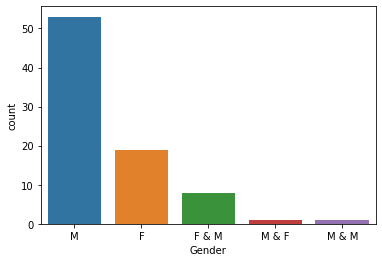

In [14]:
sns.countplot(data.Gender)

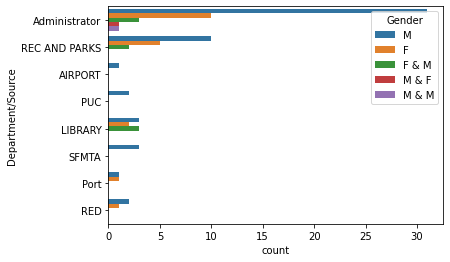

In [15]:
sns.countplot(y ='Department/Source' ,hue='Gender', data=data)

# Some properties appeared to be shared given the irregularies between name, persons and gender, let see.

In [16]:
shared_cols = ['F & M','M & F','M & M']   
shared = data[data['Gender'].isin(shared_cols)] 
shared =shared.reset_index(drop=True)
shared.head()

,Department/Source,Name,Person,Gender
0,Administrator,Priscilla Chan and Mark Zuckerberg San Francis...,Priscilla Chan and Mark Zuckerberg,F & M
1,REC AND PARKS,Minnie & Lovie Ward Recreation Center,Minnie & Lovie Ward,F & M
2,Administrator,Charlotte and George Shultz Horseshoe Drive,Charlotte and George Shultz,F & M
3,Administrator,Walter and Elise Haas Grand Lounge,Walter and Elise Hass,M & F
4,LIBRARY,Syncip Family Conference Room,Syncip Family,F & M


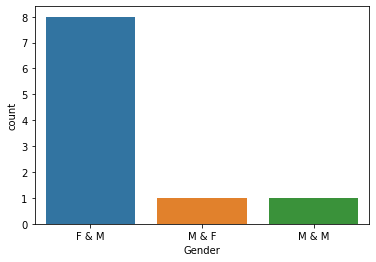

In [17]:
sns.countplot(shared.Gender)

In [18]:
#Remove shared rows, that is, the M & F, F & M, M & M.
data2 = data[ (data['Gender'] != 'M & F') & (data['Gender'] != 'M & M') & (data['Gender'] != 'F & M')]
data2.head()

,Department/Source,Name,Person,Gender
0,Administrator,MOSCONE CENTER (South),George R. Moscone,M
1,Administrator,Maxine Hall Health Center,Unknown,F
2,REC AND PARKS,Moscone Recreation Center,George R. Moscone,M
3,REC AND PARKS,"Helen Crocker Russell Library of Horticulture,...",Helen Crocker,F
4,REC AND PARKS,"Sharon Building, Golden Gate Park",Sharon Building,M


In [19]:
data2.describe()

,Department/Source,Name,Person,Gender
count,72,72,72,72
unique,8,72,60,2
top,Administrator,Flynn Tire Shop,George R. Moscone,M
freq,41,1,6,53


In [20]:
data2.Gender.value_counts()

M    53
F    19
Name: Gender, dtype: int64

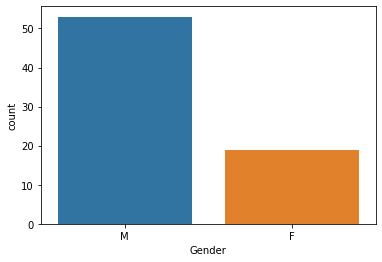

In [21]:
sns.countplot(data2.Gender)

In [22]:
#Check for duplicate row 
repeated_p = data2[data2.duplicated('Person')]
repeated_p

,Department/Source,Name,Person,Gender
2,REC AND PARKS,Moscone Recreation Center,George R. Moscone,M
22,Administrator,Flynn Tire Shop,H. Welton Flynn,M
31,REC AND PARKS,"Harvey Milk Center for Recreational Arts, Dubo...",Harvey Milk,M
38,Administrator,Harvey Milk Terminal - Terminal 1,Harvey Milk,M
42,Administrator,Moscone West,George R. Moscone,M
46,Administrator,Moscone Esplanade Ballroom,George R. Moscone,M
50,Administrator,J.M. Woods Div-Wash/Warehouse,J. M. Woods,M
52,Administrator,De Young Museum,M. H. de Young,M
70,Administrator,J.M. Woods Div-Operators,J. M. Woods,M
76,Administrator,MOSCONE NORTH,George R. Moscone,M


In [23]:
#Drop the duplicate rows
data3=data2.drop([2, 22, 31, 38, 42, 46, 50, 52, 70, 76, 77, 80])
data3=data3.reset_index(drop=True)
data3.describe()

,Department/Source,Name,Person,Gender
count,60,60,60,60
unique,8,60,60,2
top,Administrator,(Josephine Dow) Randall Museum,James R. Herman,M
freq,31,1,1,41


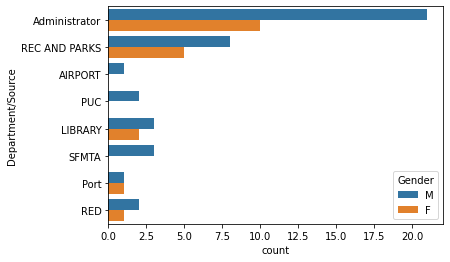

In [24]:
sns.countplot(y ='Department/Source' ,hue='Gender', data=data3)

# Deduction
In gender distribution, the Men have a larger percentage compared to the Women.
The analysis according to Department/Source shows 'Port' is evenly represented by both genders, and unevenly in other department/Source.